# **2. Problema ML**

Because we are assuming that this is a GDP growth estimation by country, this is a Supervised Learning Regression problem.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [23]:
df = pd.read_csv("src/data_sample/gdp_model_focused.csv")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16900 entries, 0 to 16899
Data columns (total 17 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   year                                                        16900 non-null  int64  
 1   country                                                     16900 non-null  object 
 2   GDP growth (annual %)                                       13575 non-null  float64
 3   GDP per capita (constant 2015 US$)                          13695 non-null  float64
 4   Gross fixed capital formation (% of GDP)                    9793 non-null   float64
 5   Gross domestic savings (% of GDP)                           10497 non-null  float64
 6   Inflation, GDP deflator (annual %)                          13470 non-null  float64
 7   Exports of goods and services (% of GDP)                    10802 non-null  float64
 

In [25]:
df.columns

Index(['year', 'country', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'Gross fixed capital formation (% of GDP)',
       'Gross domestic savings (% of GDP)',
       'Inflation, GDP deflator (annual %)',
       'Exports of goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Population growth (annual %)',
       'Industry (including construction), value added (% of GDP)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Services, value added (% of GDP)',
       'School enrollment, secondary (% gross)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Access to electricity, rural (% of rural population)'],
      dtype='object')

In [26]:
df["GDP growth (annual %)"].value_counts()

GDP growth (annual %)
 0.000000     15
 3.761612      2
 0.619467      2
 4.286275      2
 11.647093     2
              ..
-0.236337      1
 3.772402      1
 6.054514      1
 10.399009     1
 5.336730      1
Name: count, Length: 13434, dtype: int64

In [27]:
df.head()

,year,country,GDP growth (annual %),GDP per capita (constant 2015 US$),Gross fixed capital formation (% of GDP),Gross domestic savings (% of GDP),"Inflation, GDP deflator (annual %)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),"Foreign direct investment, net inflows (% of GDP)",Population growth (annual %),"Industry (including construction), value added (% of GDP)","Agriculture, forestry, and fishing, value added (% of GDP)","Services, value added (% of GDP)","School enrollment, secondary (% gross)","Literacy rate, adult total (% of people ages 15 and above)","Access to electricity, rural (% of rural population)"
0,1960,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960,AFE,NaN,1172.316285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960,AFW,NaN,1110.513849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.value_counts()

year  country  GDP growth (annual %)  GDP per capita (constant 2015 US$)  Gross fixed capital formation (% of GDP)  Gross domestic savings (% of GDP)  Inflation, GDP deflator (annual %)  Exports of goods and services (% of GDP)  Imports of goods and services (% of GDP)  Foreign direct investment, net inflows (% of GDP)  Population growth (annual %)  Industry (including construction), value added (% of GDP)  Agriculture, forestry, and fishing, value added (% of GDP)  Services, value added (% of GDP)  School enrollment, secondary (% gross)  Literacy rate, adult total (% of people ages 15 and above)  Access to electricity, rural (% of rural population)
1990  MUS      7.186737               3810.480833                         30.176859                                  24.034973                         10.583631                           64.093928                                 71.196573                                 1.526106                                           0.712313            

# **3. Target**

In [29]:
target = "GDP growth (annual %)"

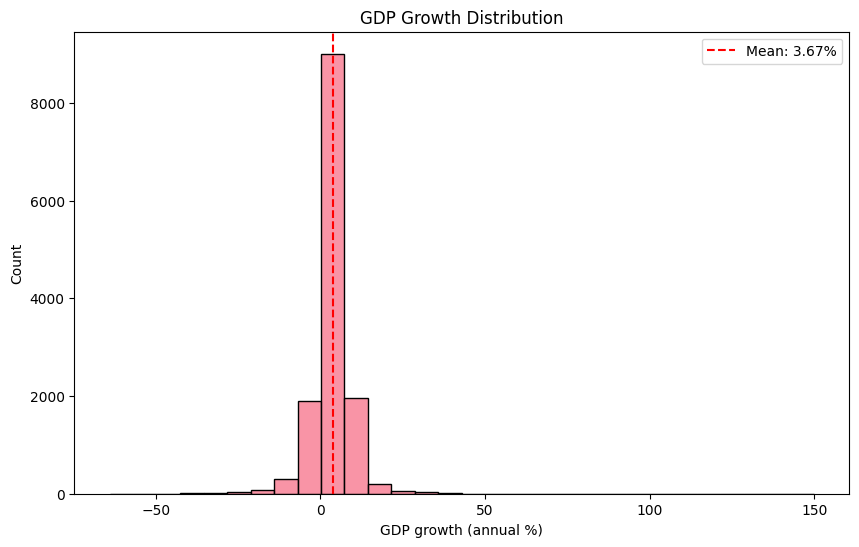

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="GDP growth (annual %)", bins=30)
plt.title('GDP Growth Distribution')
plt.axvline(df["GDP growth (annual %)"].mean(), color='red', linestyle='--', label=f'Mean: {df["GDP growth (annual %)"].mean():.2f}%')
plt.legend()
plt.show()

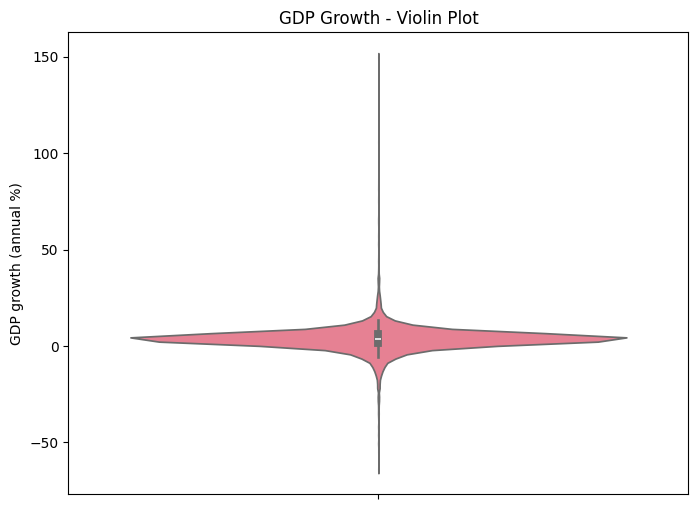

In [31]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, y="GDP growth (annual %)")
plt.title('GDP Growth - Violin Plot')
plt.show()

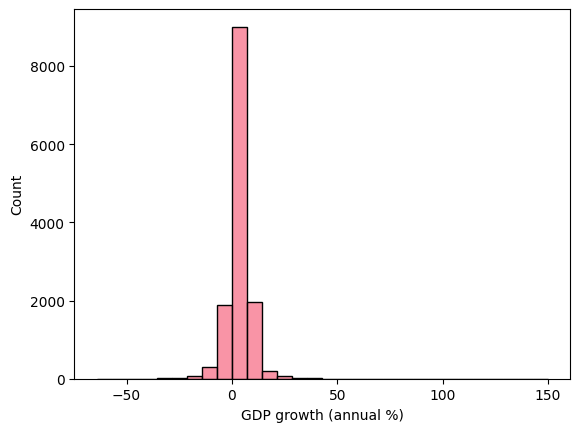

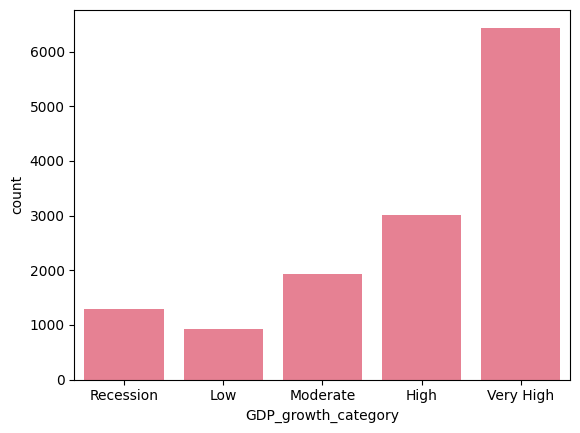

In [32]:

sns.histplot(data=df, x="GDP growth (annual %)", bins=30)
plt.show()

# Or if you want to bin the continuous values into categories first:
df['GDP_growth_category'] = pd.cut(df["GDP growth (annual %)"], 
                                  bins=[-float('inf'), -2, 0, 2, 4, float('inf')], 
                                  labels=['Recession', 'Low', 'Moderate', 'High', 'Very High'])
sns.countplot(data=df, x='GDP_growth_category')
plt.show()

In [33]:
print("GDP Growth - Descriptive Statistics:")
print(df["GDP growth (annual %)"].describe())
print(f"\nSkewness: {df['GDP growth (annual %)'].skew():.3f}")
print(f"Kurtosis: {df['GDP growth (annual %)'].kurtosis():.3f}")

GDP Growth - Descriptive Statistics:
count    13575.000000
mean         3.669586
std          6.230779
min        -64.047107
25%          1.373394
50%          3.807604
75%          6.152008
max        149.972963
Name: GDP growth (annual %), dtype: float64

Skewness: 1.835
Kurtosis: 49.315


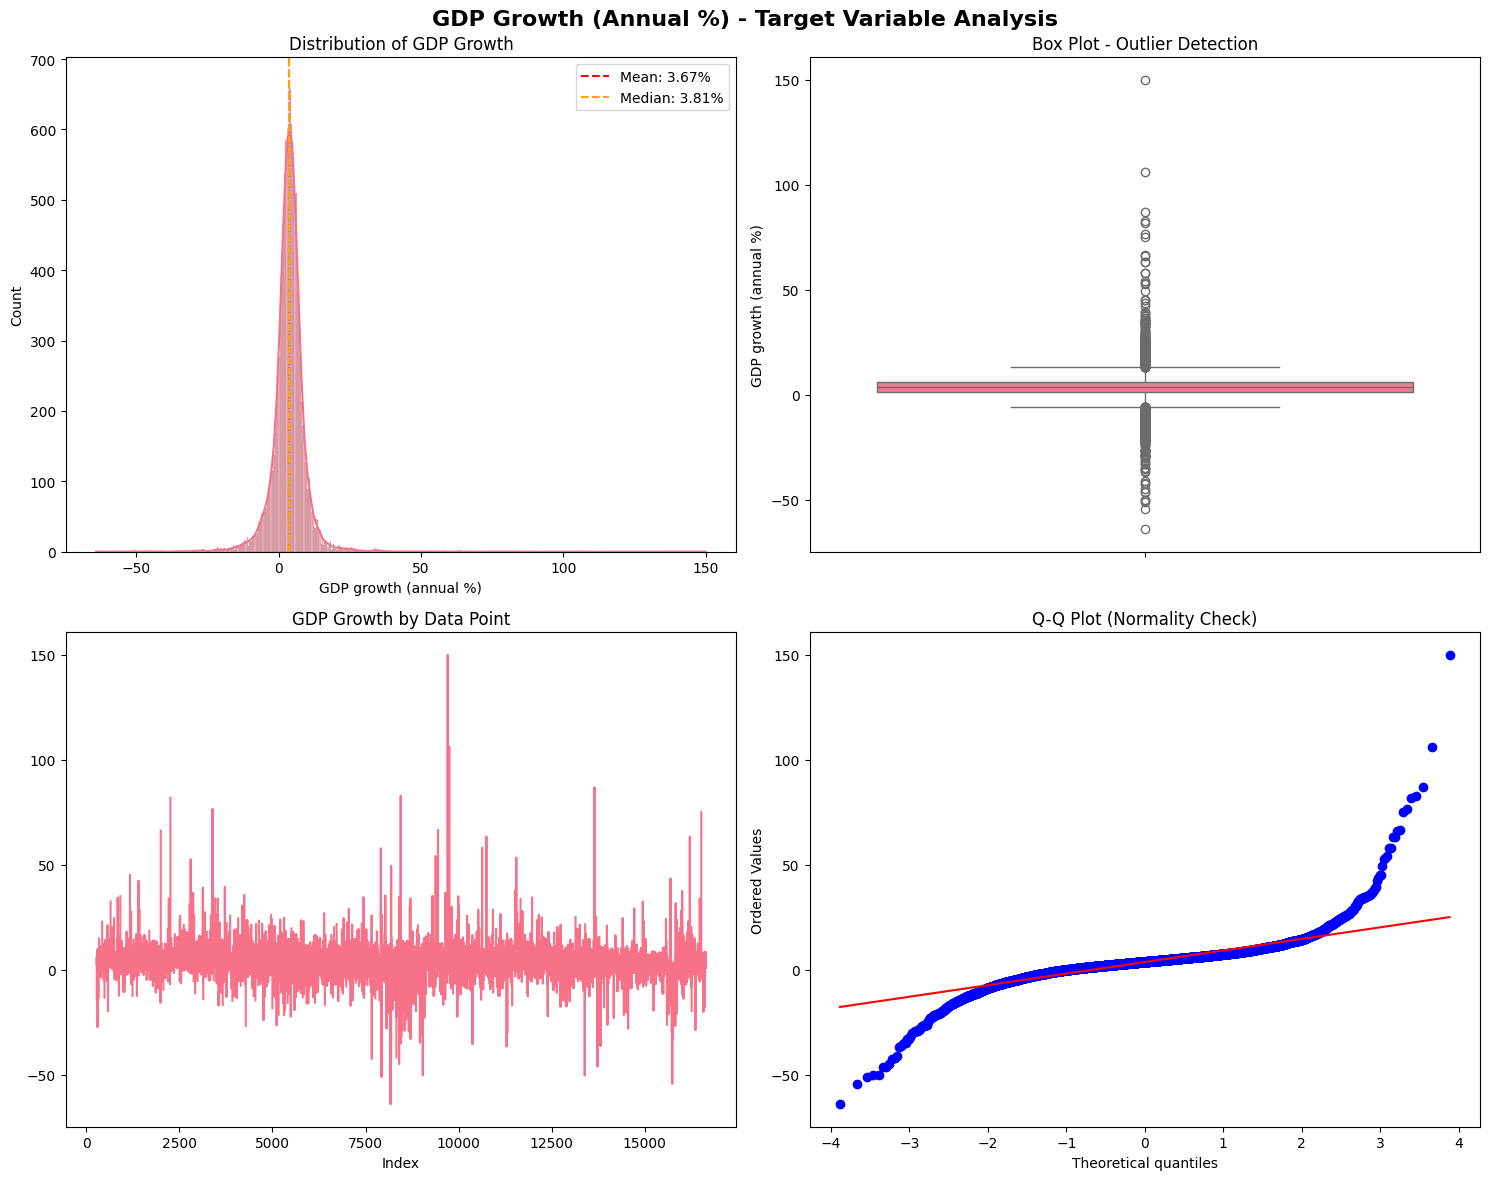

In [34]:
# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('GDP Growth (Annual %) - Target Variable Analysis', fontsize=16, fontweight='bold')

# 1. Distribution plot (histogram + KDE)
sns.histplot(data=df, x="GDP growth (annual %)", kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of GDP Growth')
axes[0,0].axvline(df["GDP growth (annual %)"].mean(), color='red', linestyle='--', label=f'Mean: {df["GDP growth (annual %)"].mean():.2f}%')
axes[0,0].axvline(df["GDP growth (annual %)"].median(), color='orange', linestyle='--', label=f'Median: {df["GDP growth (annual %)"].median():.2f}%')
axes[0,0].legend()

# 2. Box plot to see outliers
sns.boxplot(data=df, y="GDP growth (annual %)", ax=axes[0,1])
axes[0,1].set_title('Box Plot - Outlier Detection')

# 3. Time series plot (if you have a time/date column)
# Replace 'Year' with your actual time column name
if 'Year' in df.columns:
    sns.lineplot(data=df, x="Year", y="GDP growth (annual %)", ax=axes[1,0])
    axes[1,0].set_title('GDP Growth Over Time')
    axes[1,0].tick_params(axis='x', rotation=45)
else:
    # If no time column, show a simple line plot by index
    axes[1,0].plot(df.index, df["GDP growth (annual %)"])
    axes[1,0].set_title('GDP Growth by Data Point')
    axes[1,0].set_xlabel('Index')

# 4. Q-Q plot to check normality
from scipy import stats
stats.probplot(df["GDP growth (annual %)"].dropna(), dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot (Normality Check)')

plt.tight_layout()
plt.show()

In [35]:
print(f"\nMissing values: {df['GDP growth (annual %)'].isnull().sum()}")
print(f"Percentage missing: {(df['GDP growth (annual %)'].isnull().sum() / len(df))* 100:.2f}%")


Missing values: 3325
Percentage missing: 19.67%


TypeError: ufunc 'log' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

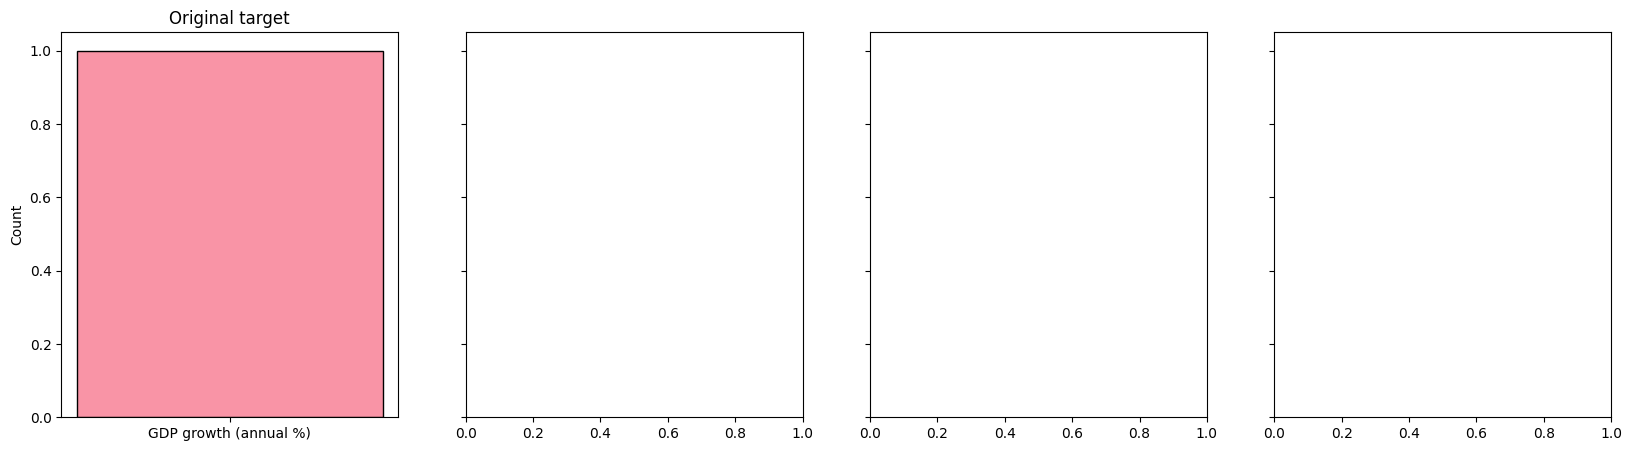

In [36]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)


# Original target
sns.histplot(target, kde=False, ax=axes[0])
axes[0].set_title("Original target")

# Logaritmic
sns.histplot(np.log(target),kde=False, ax=axes[1])
axes[1].set_title("Log")

# Box-cox
sns.histplot(stats.boxcox(target)[0],kde=False, ax=axes[2])
axes[2].set_title("Box-Cox");

# Power 2
sns.histplot(np.power(target, 2),kde=False, ax=axes[3])
axes[3].set_title("Power 2");

# **4. Train and Test**

In [37]:
df["target"] = df["GDP growth (annual %)"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis=1),
                                                    df['target'],
                                                    test_size=0.2,
                                                    random_state=42)